## KNN 算法 (K-Nearest Neighbors)

对于新来的样本点, 求出它和其他样本点的距离, 然后对距离进行排序, 并取出前 k 个最小的距离, 在 k 个距离中进行投票得到新样本点的预测 label.

可以用到的函数:

+ `np.argsort()` : 对距离排序后获得其他样本点的位置
+ `[y_train[i] for i in np.argsort()[:k]]` : 获得最近 k 个样本的标签
+ `Counter()` : 用于 k 个样本的标签进行统计并投票
+ `most_common(m)` : 取出前 m 个投票数最多的 label

对于 KNN 来说, 它比较特殊, 它不需要进行训练, 训练集就是模型.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

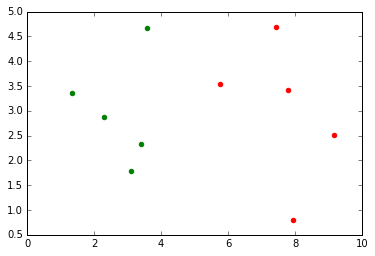

In [4]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='g')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='r')

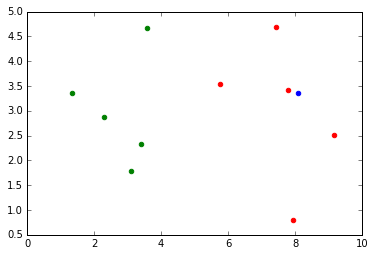

In [5]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

In [12]:
distances = [np.sqrt(np.sum(np.square(x - x_train))) for x_train in X_train]

In [16]:
nearest = np.argsort(distances) # 求出距离最近的点的索引
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [17]:
k = 6

In [19]:
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [21]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({0: 1, 1: 5})

In [22]:
votes.most_common(1)

[(1, 5)]

In [26]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

### 使用 scikit-learn 中的 kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [29]:
# fit 拟合, 训练出来的模型要拟合训练数据.
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [31]:
# predict 希望传入一个 2D 的矩阵, 而不是一个 1D 的向量.(1D的向量是列向量, 比如大小为(10,), ndim=1)
kNN_classifier.predict(x.reshape(1, -1)) 

array([1])